**Reference**: https://github.com/qiskit-community/ibm-quantum-challenge-2024/blob/main/content/lab_3/lab-3-serverless.ipynb

In [ ]:
### Install Qiskit and relevant packages, if needed
### IMPORTANT: Make sure you are on 3.10 > python < 3.12
%pip install -q qiskit[visualization]==1.0.2
%pip install -q qiskit-ibm-runtime
%pip install -q qiskit-aer
%pip install -q graphviz
%pip install -q qiskit-serverless -U
%pip install -q qiskit-transpiler-service -U
%pip install -q git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git -U

In [312]:
%set_env QXToken=16d6dd47657b972c1547b10fb7844fd1a407cc047430da104bd28a29a7394da2ea55115ecfcd09ba4e930ff8372156429ecf693000068b161a776b05b93c191b

env: QXToken=16d6dd47657b972c1547b10fb7844fd1a407cc047430da104bd28a29a7394da2ea55115ecfcd09ba4e930ff8372156429ecf693000068b161a776b05b93c191b


In [313]:
# qc-grader should be 0.18.11 (or higher)
import qc_grader

qc_grader.__version__

'0.18.11'

In [314]:
# Import all in one cell

import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer
import warnings

from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.circuit.random import random_circuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import TwoLocal, EfficientSU2
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Session, Options
from qiskit_serverless import QiskitFunction, save_result, get_arguments, save_result, distribute_task, distribute_qiskit_function, IBMServerlessClient, QiskitFunction
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_transpiler_service.transpiler_service import TranspilerService
from qiskit_aer import AerSimulator

In [315]:
# Import for grader
from qc_grader.challenges.iqc_2024 import grade_lab3_qs_ex1, grade_lab3_qs_ex2

![image.png](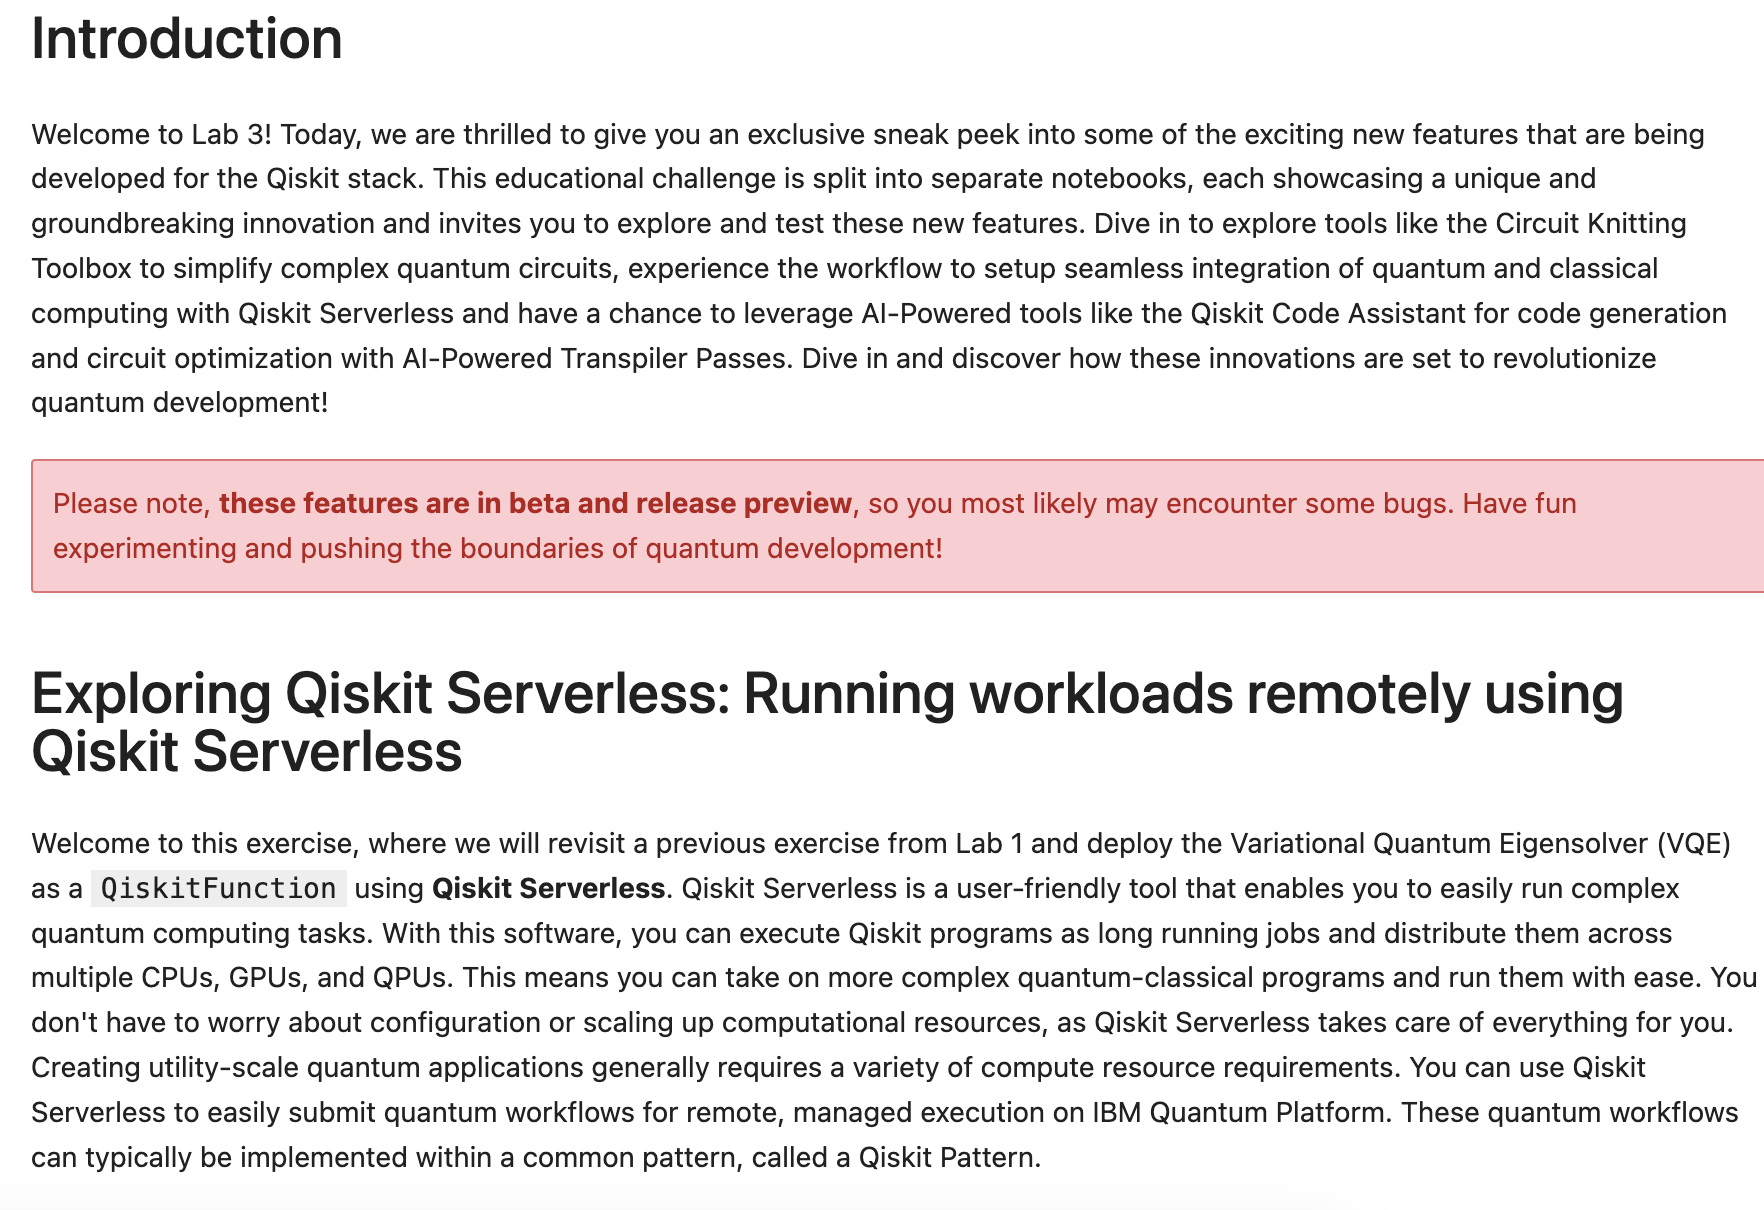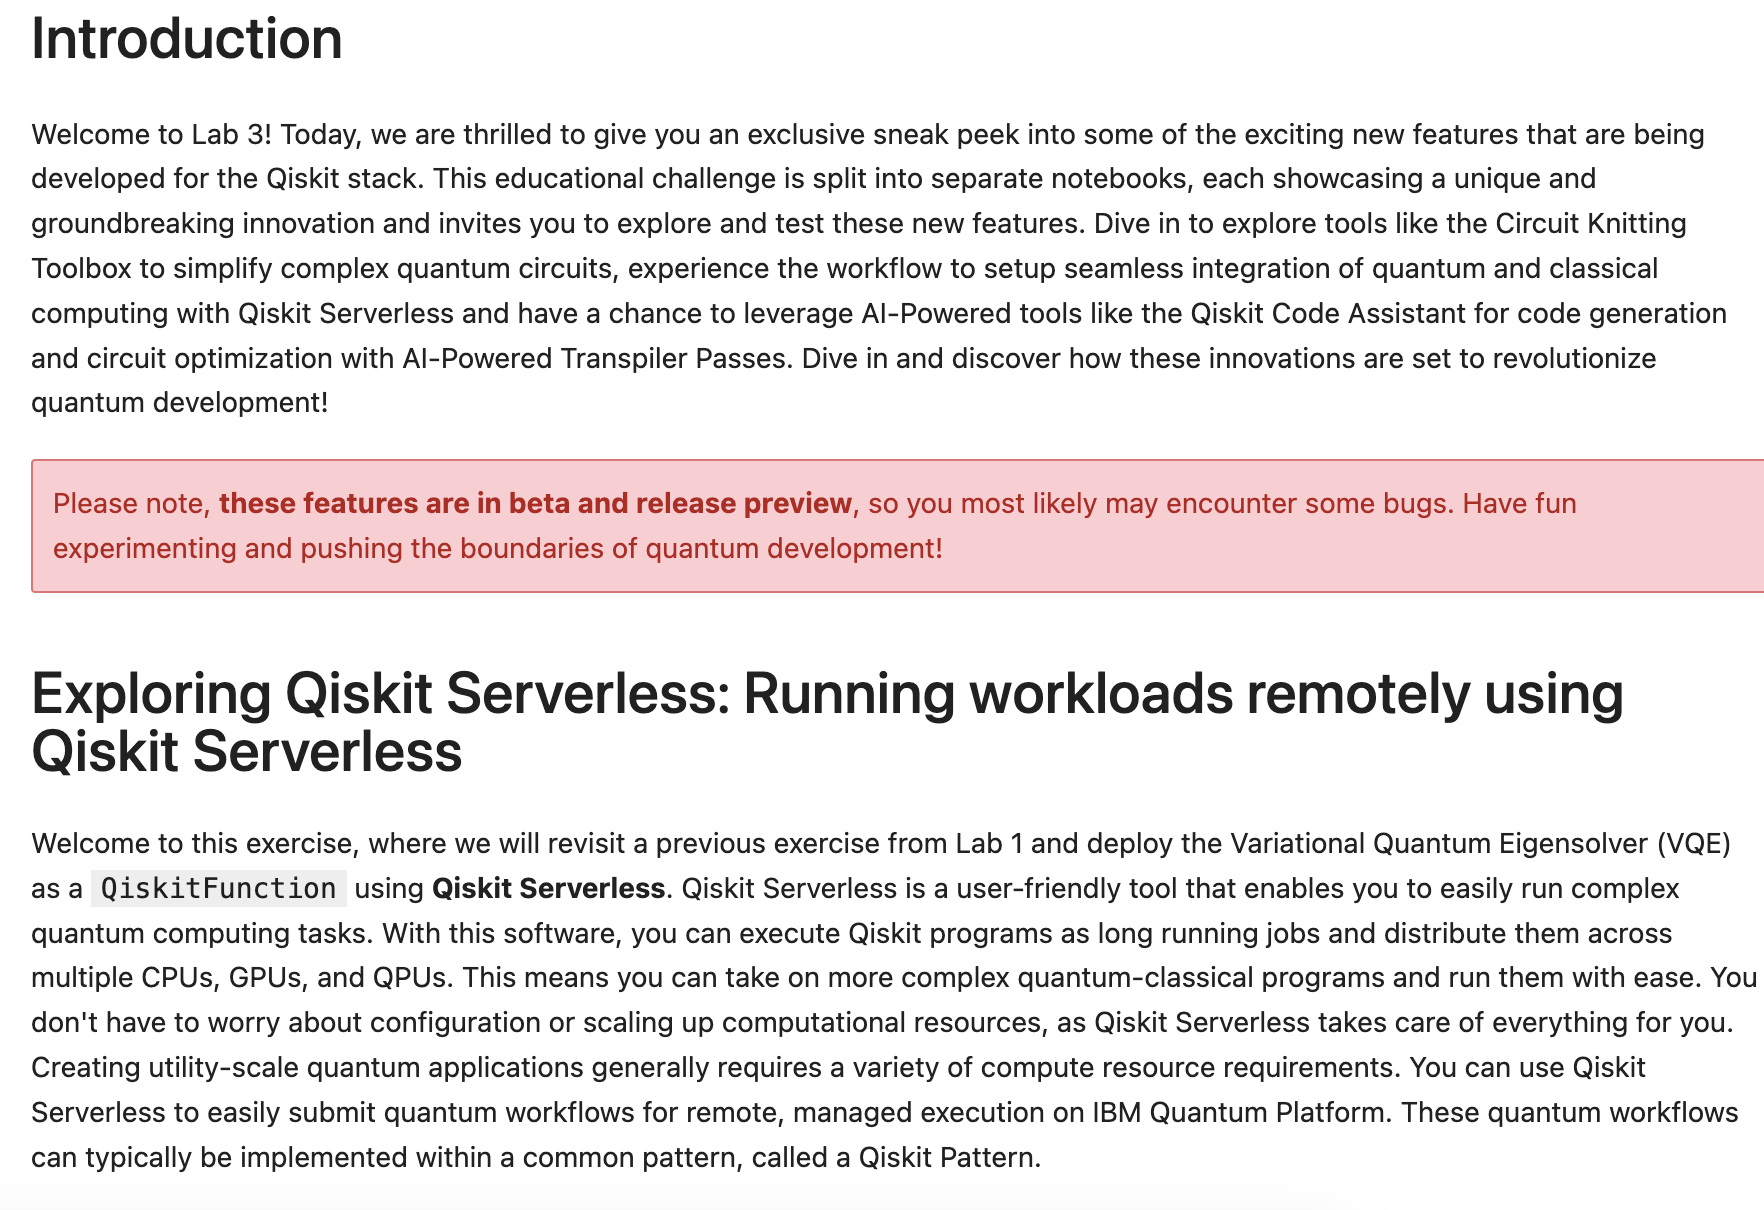)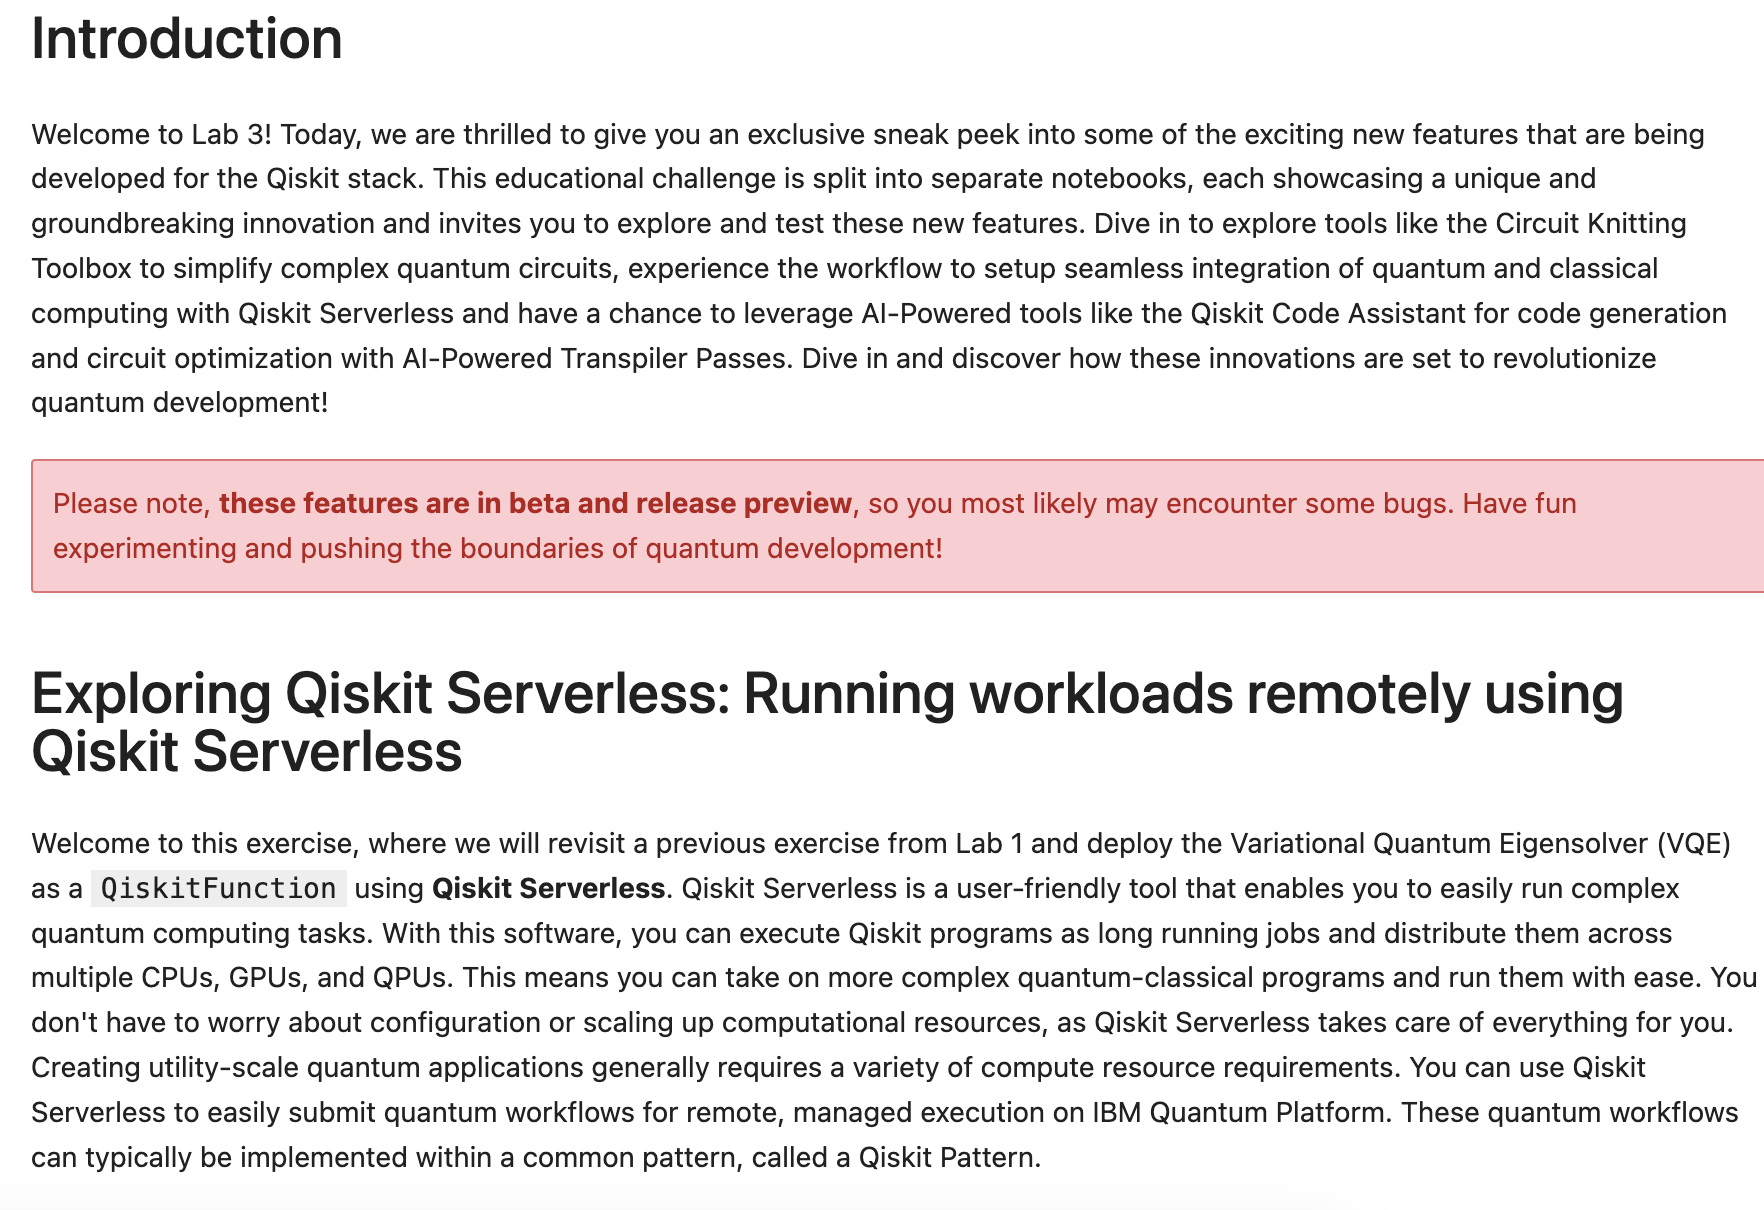

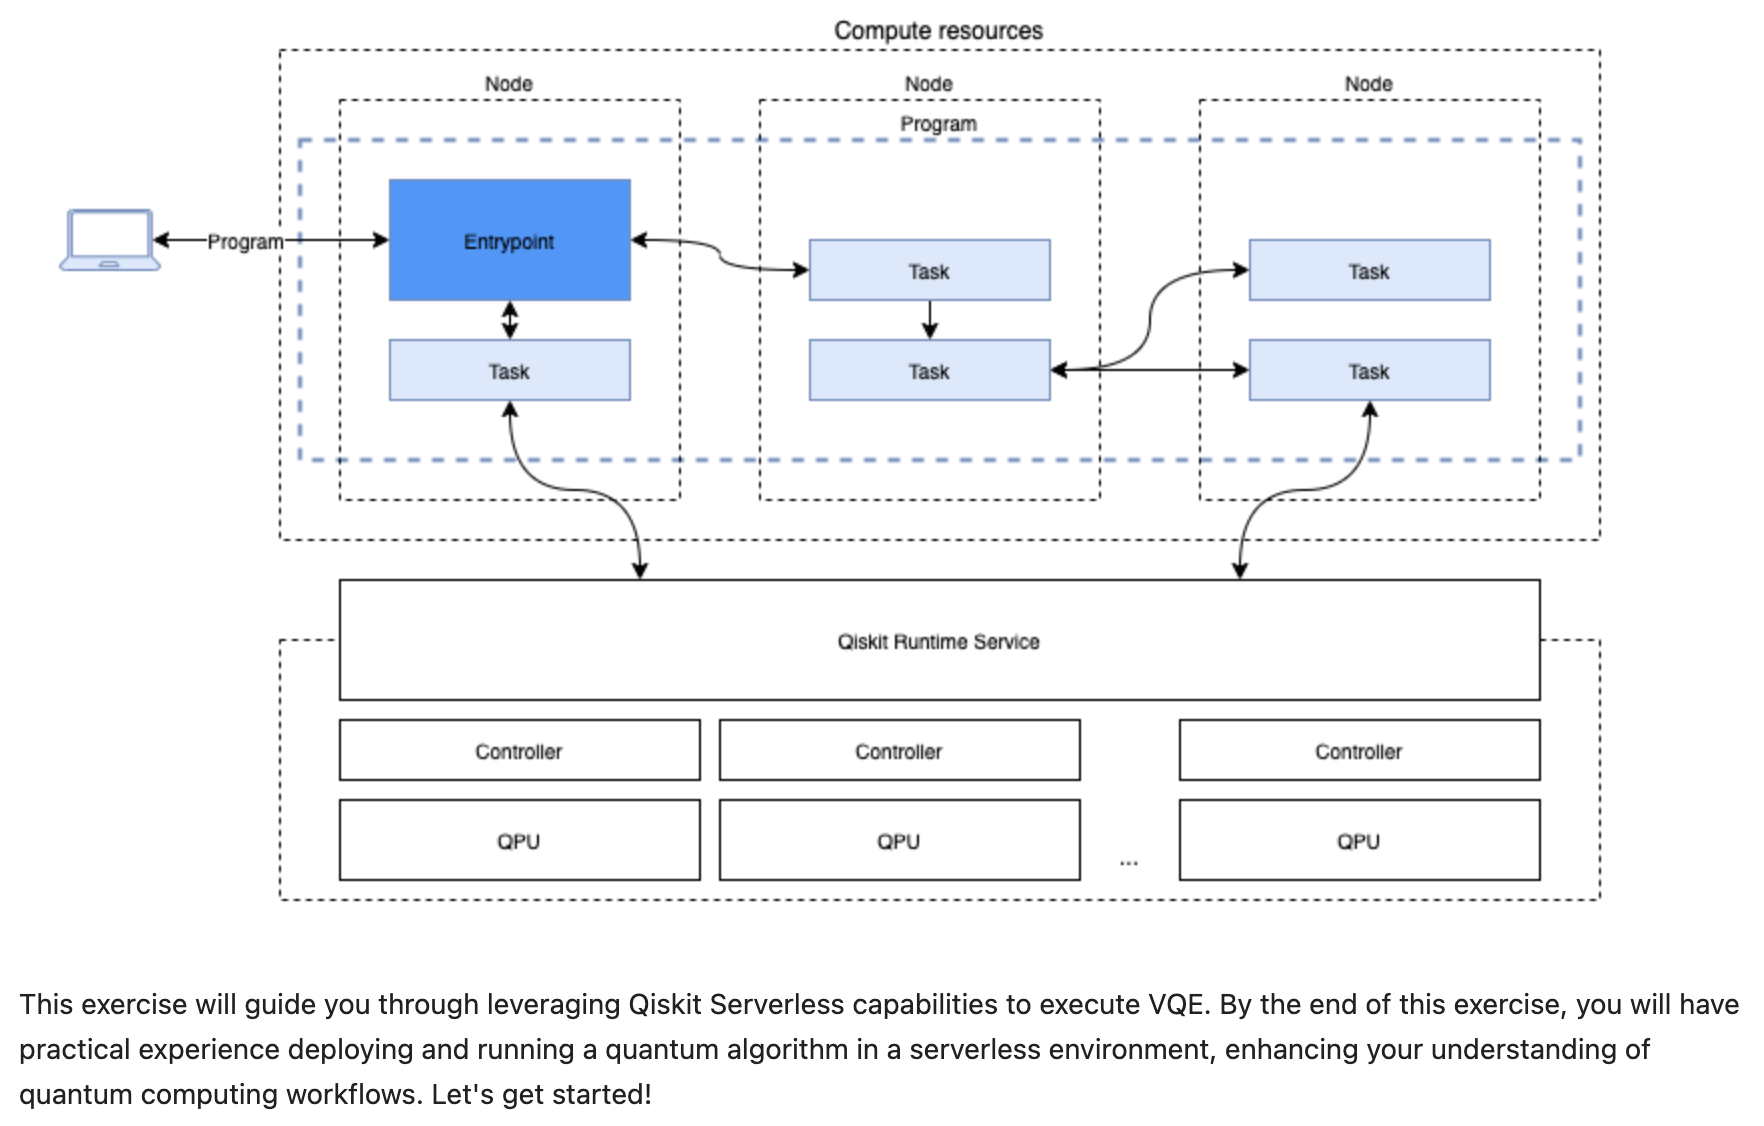

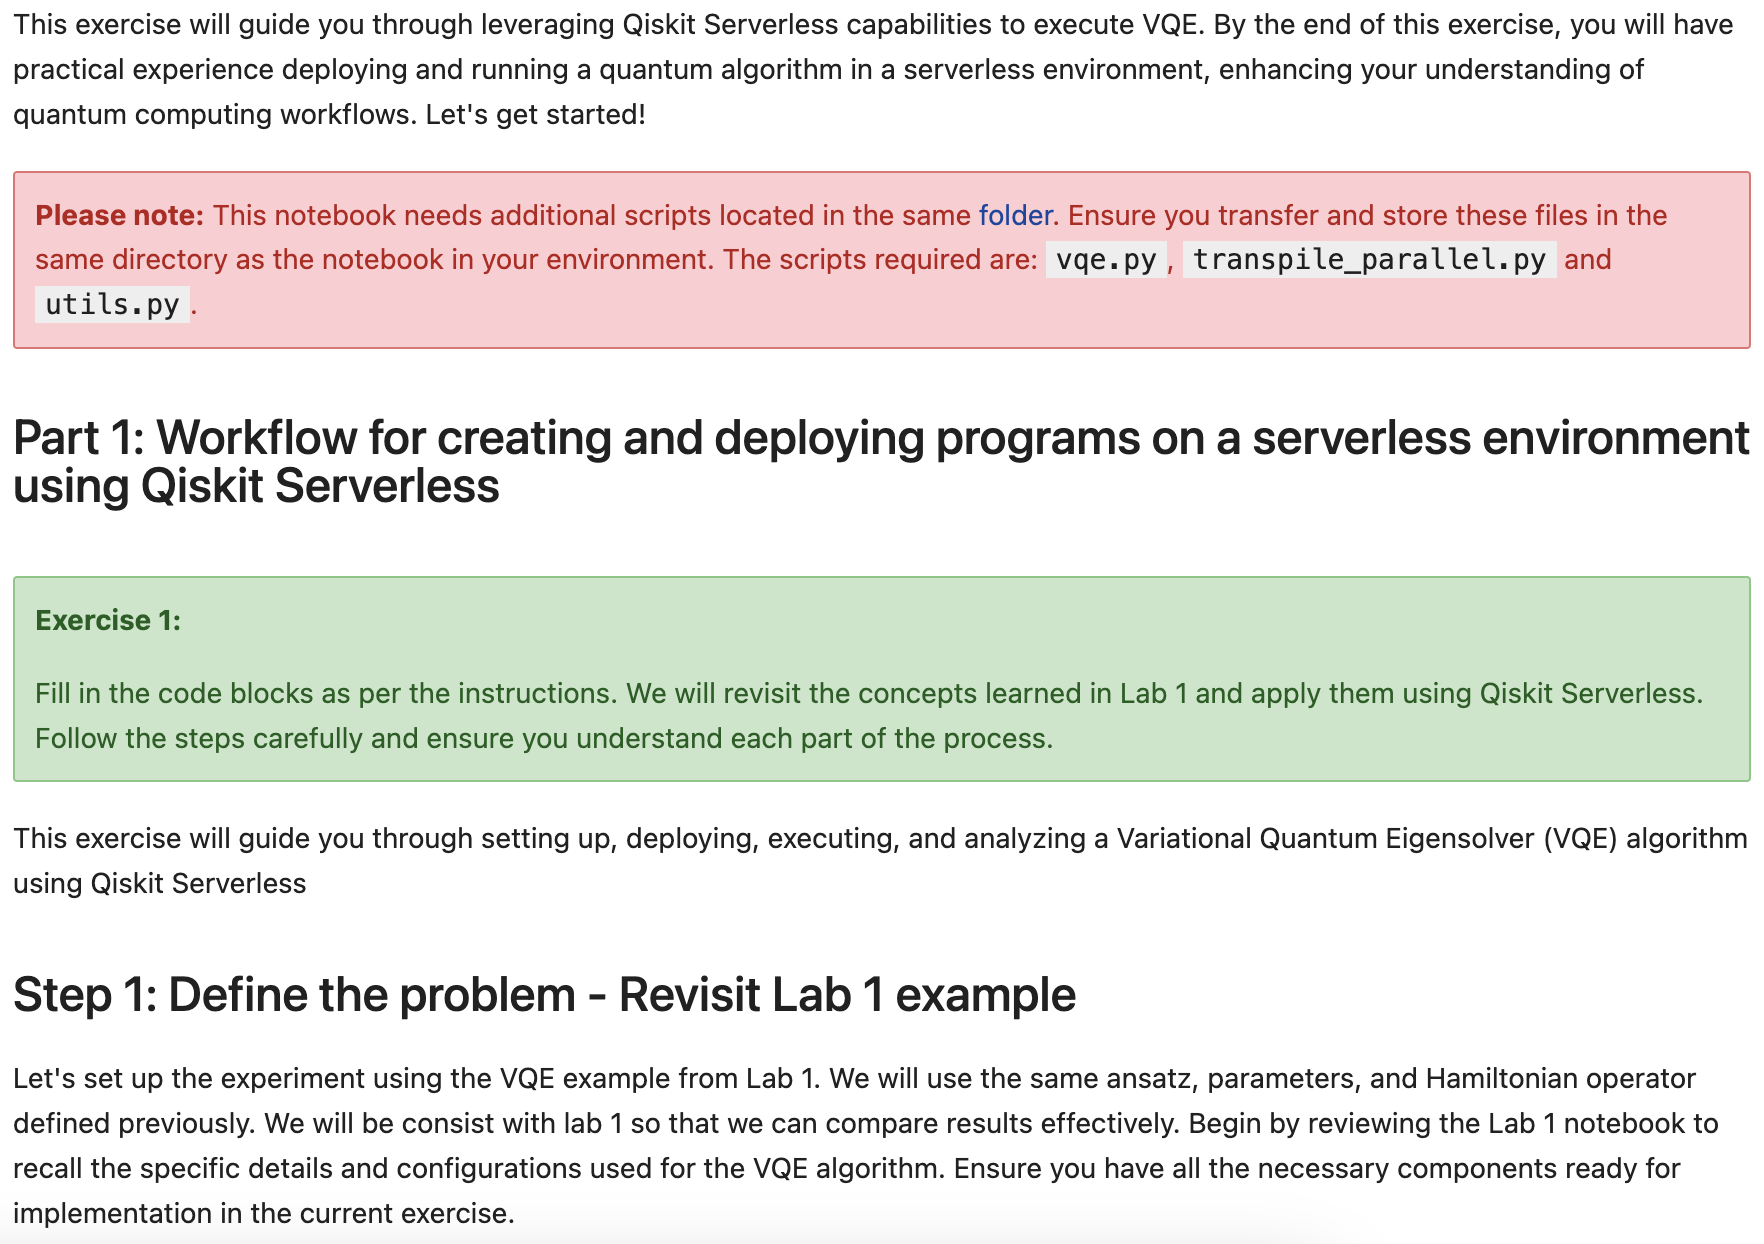

In [316]:
## If this is your first time accessing the backend
## remove # and fill your API key, and run the code

QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token="16d6dd47657b972c1547b10fb7844fd1a407cc047430da104bd28a29a7394da2ea55115ecfcd09ba4e930ff8372156429ecf693000068b161a776b05b93c191b",
    set_as_default=True,
    overwrite=True,
)

# Load saved credentials
service = QiskitRuntimeService()


# service = QiskitRuntimeService(
#    channel='ibm_quantum',
#   #  instance='ibm-q/open/main',
#    token='16d6dd47657b972c1547b10fb7844fd1a407cc047430da104bd28a29a7394da2ea55115ecfcd09ba4e930ff8372156429ecf693000068b161a776b05b93c191b'
# )

# service = QiskitRuntimeService(channel="ibm_quantum")

# Specify a system to use for transpilation, DO NOT change
backend = service.backend("ibm_brisbane")

In [317]:
# Number of qubits
num_qubits = 3

# Define rotation blocks (Ry and Rz)
rotation_blocks = ['ry', 'rz']

# Define entanglement blocks (Cz)
entanglement_blocks = 'cz'

# Define entanglement type
entanglement = 'full'

# Create the ansatz with the specified parameters
ansatz = TwoLocal(num_qubits=num_qubits,
                  rotation_blocks=rotation_blocks,
                  entanglement_blocks=entanglement_blocks,
                  entanglement=entanglement,
                  reps=1,
                  insert_barriers=True)

# Visualize the circuit
ansatz.decompose().draw('mpl')


# Define parameters
num_params = ansatz.num_parameters

# Qiskit Pattern Step 2: Optimize the circuit for quantum execution
optimization_level = 2
pm = generate_preset_pass_manager(backend=backend, optimization_level=optimization_level)
isa_circuit = pm.run(ansatz)

# Define Hamiltonian for VQE
pauli_op = SparsePauliOp(['ZII', 'IZI', 'IIZ'])
hamiltonian_isa = pauli_op.apply_layout(layout=isa_circuit.layout)

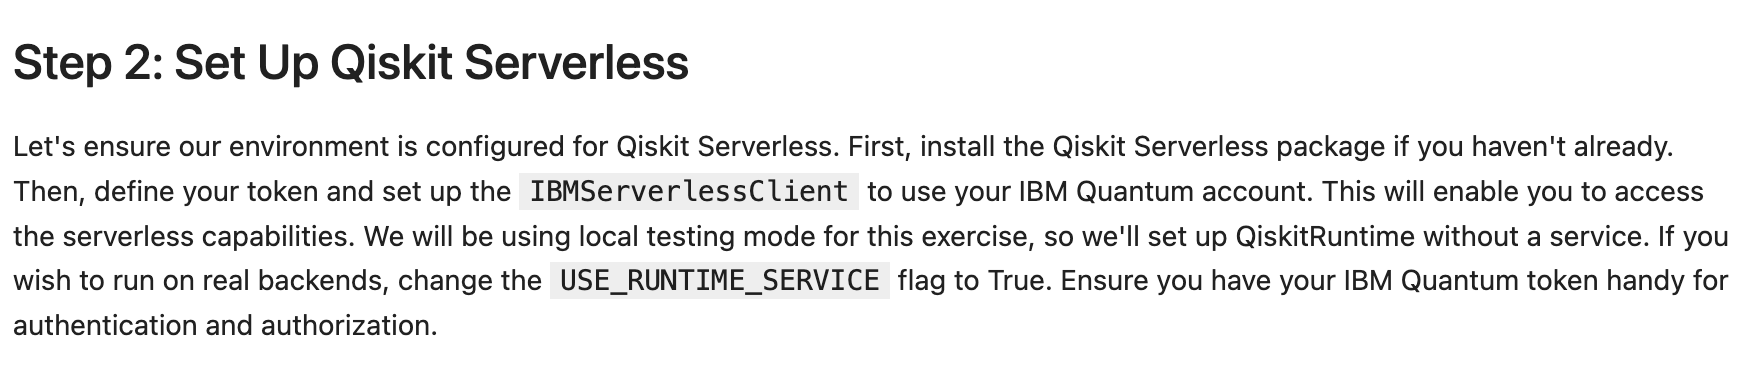

In [318]:
# Setup Qiskit Serverless Client and Qiskit Runtime client
client = IBMServerlessClient("16d6dd47657b972c1547b10fb7844fd1a407cc047430da104bd28a29a7394da2ea55115ecfcd09ba4e930ff8372156429ecf693000068b161a776b05b93c191b") # Add in your IBM Quantum Token to QiskitServerless Client

# For the challenge, we will be using QiskitRuntime Local testing mode. Change to True only if you wish to use real backend.
USE_RUNTIME_SERVICE = False

if USE_RUNTIME_SERVICE:
    service = QiskitRuntimeService(
        channel='ibm_quantum',
        verify=False
    )
else:
    service = None

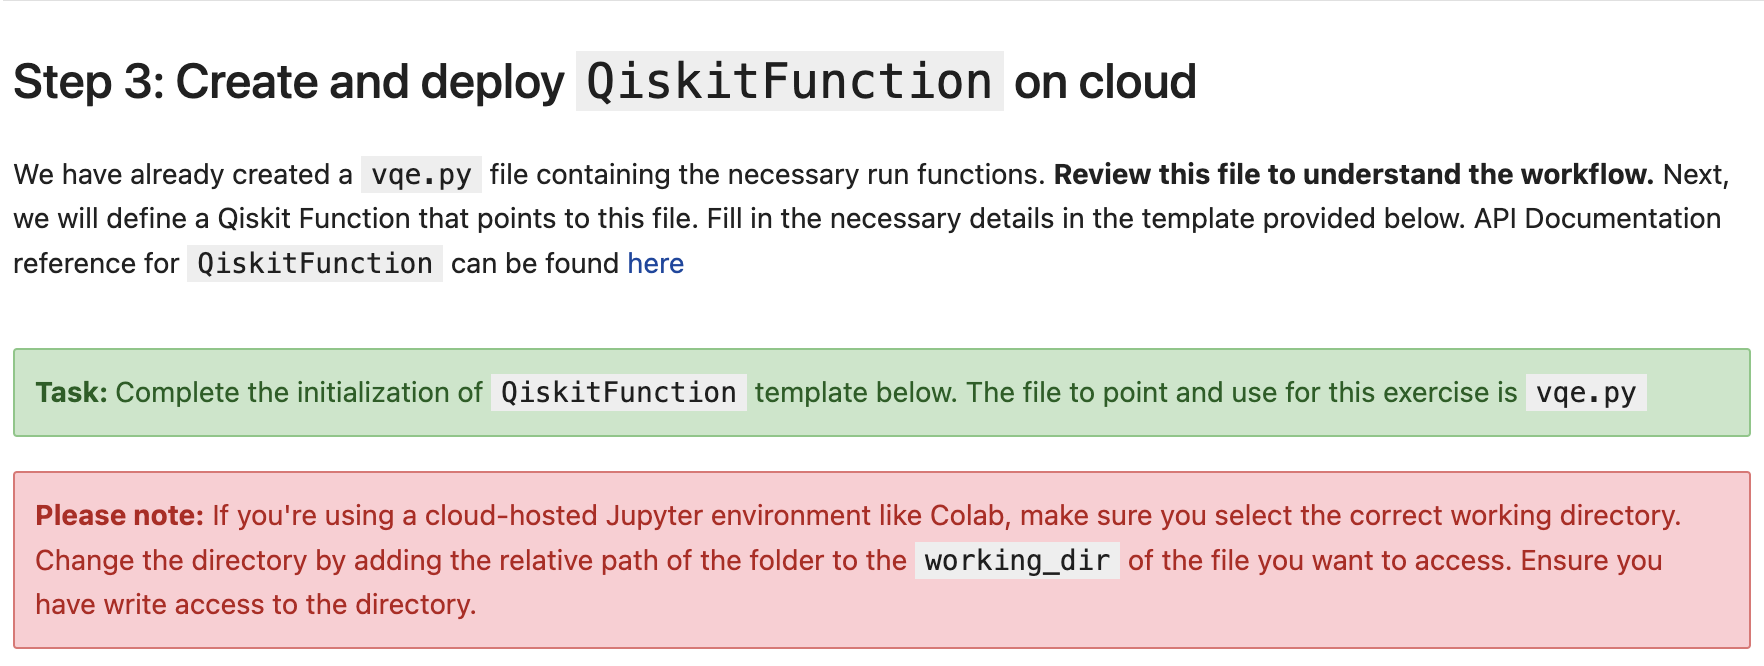

In [319]:
import os

# Get the current working directory
current_directory = os.getcwd()

# List all files and directories in the current directory
files_and_directories = os.listdir(current_directory)

# Print the list of files and directories
print(files_and_directories)


['.config', '.ipynb_checkpoints', 'artifact.tar', 'transpile_parallel.py', 'vqe', 'utils.py', 'transpile_parallel', 'sample_data']


In [320]:
# Define the Qiskit Function
if USE_RUNTIME_SERVICE:
    function = QiskitFunction(title= "vqe", entrypoint="vqe.py", working_dir="./vqe")
else:
    function = QiskitFunction(title= "vqe" , entrypoint="vqe.py", working_dir="./vqe",  dependencies=["qiskit_aer"])
function

QiskitFunction(vqe)

In [321]:
# Upload the Qiskit Function using IBMServerlessClient
client.upload(function)

'vqe'

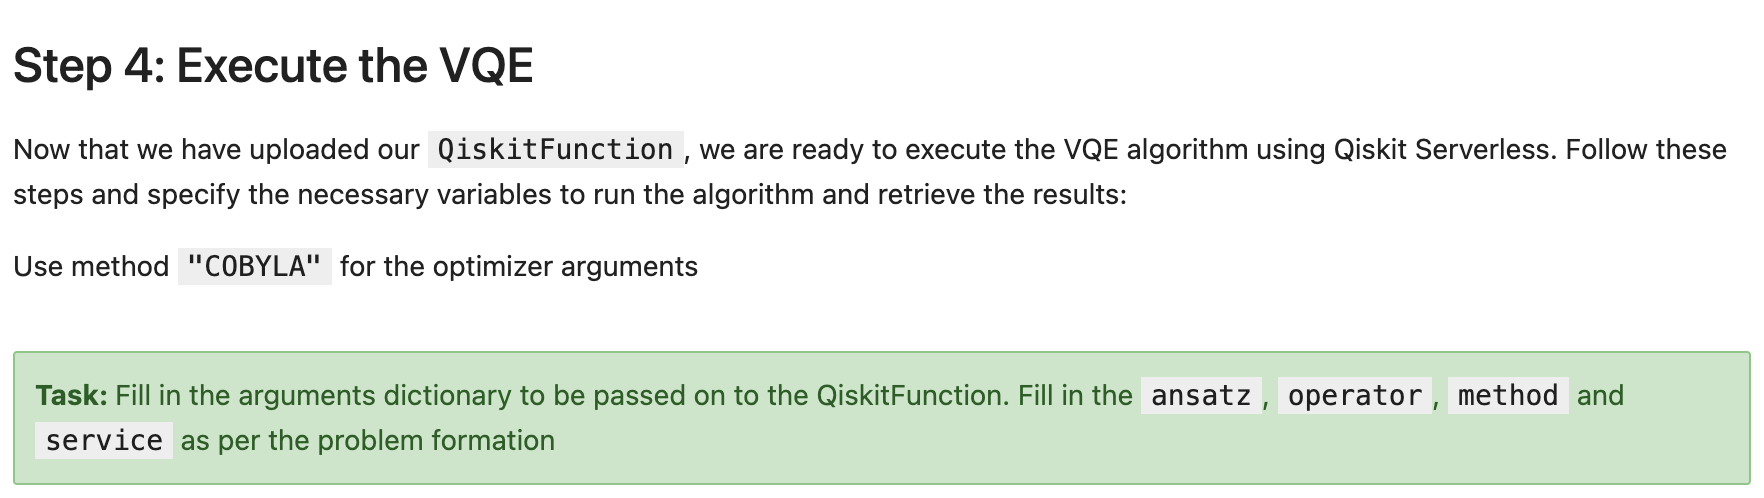

In [322]:
# Define input_arguments
input_arguments = {
    "ansatz": isa_circuit,  # Replace with your transpiled ansatz
    "operator": hamiltonian_isa,  # Replace with the hamiltonian operator
    "method": "COBYLA",  # Using COBYLA method for the optimizer
    "service": service  # Add your QiskitFunction object here
}

# Qiskit Pattern Step 3: Run the payload on backend
job = client.run("vqe", arguments=input_arguments)


In [324]:
# Submit your answer using following code

grade_lab3_qs_ex1(function, input_arguments, job)
# Expected result type: QiskitFunction, dict, Job

Submitting your answer. Please wait...
Oops 😕! 'list' object has no attribute 'get'
Please review your answer and try again.


In [29]:
# Return jobid
job

<Job | 9b61fc50-2e07-43ad-af3f-222f77f1a58e>

**IMPORTANT**: The challenge cluster is a shared resource, so you may experience some wait time for queues for execution. Please feel free to check out the pre-run results below or run the cells yourself to see your results.

Monitor Job execution status


In [76]:
# Check job completion status
job.status()

'DONE'

In [77]:
# Monitor log
logs = job.logs()

for log in logs.splitlines():
    print(log)

Iters. done: 1 [Avg. time per iter: -]
Iters. done: 2 [Avg. time per iter: 0.02]
Iters. done: 3 [Avg. time per iter: 0.02]
Iters. done: 4 [Avg. time per iter: 0.02]
Iters. done: 5 [Avg. time per iter: 0.02]
Iters. done: 6 [Avg. time per iter: 0.02]
Iters. done: 7 [Avg. time per iter: 0.02]
Iters. done: 8 [Avg. time per iter: 0.02]
Iters. done: 9 [Avg. time per iter: 0.02]
Iters. done: 10 [Avg. time per iter: 0.02]
Iters. done: 11 [Avg. time per iter: 0.02]
Iters. done: 12 [Avg. time per iter: 0.02]
Iters. done: 13 [Avg. time per iter: 0.02]
Iters. done: 14 [Avg. time per iter: 0.02]
Iters. done: 15 [Avg. time per iter: 0.02]
Iters. done: 16 [Avg. time per iter: 0.02]
Iters. done: 17 [Avg. time per iter: 0.02]
Iters. done: 18 [Avg. time per iter: 0.02]
Iters. done: 19 [Avg. time per iter: 0.02]
Iters. done: 20 [Avg. time per iter: 0.02]
Iters. done: 21 [Avg. time per iter: 0.03]
Iters. done: 22 [Avg. time per iter: 0.03]
Iters. done: 23 [Avg. time per iter: 0.03]
Iters. done: 24 [Avg. t

**Retrieve** **Results**:
Once the execution is complete, retrieve and analyze the results.

In [78]:
# Return result from QiskitFunction job
job.result()

{'optimal_point': [6.2478687784624665,
  3.202876775529447,
  5.531064835499444,
  4.661555420243517,
  2.117200518317446,
  2.988003207153867,
  3.1875148883832374,
  6.272495978900396,
  3.8866411178925753,
  3.4314457151576923,
  4.91081145458707,
  1.3712353339699122],
 'optimal_value': -2.99072265625,
 'optimizer_time': 3.168991133570671,
 'iters': 134,
 'cost_history': [-1.45458984375,
  -1.56640625,
  -0.46142578125,
  -1.17431640625,
  -1.140625,
  -1.5341796875,
  -1.20458984375,
  -2.18798828125,
  -1.99169921875,
  -1.44482421875,
  -2.21337890625,
  -2.16259765625,
  -2.17724609375,
  -2.23779296875,
  -2.189453125,
  -2.05908203125,
  -2.369140625,
  -2.36767578125,
  -2.37158203125,
  -2.7490234375,
  -2.7587890625,
  -2.734375,
  -2.67529296875,
  -2.8486328125,
  -2.81005859375,
  -2.8857421875,
  -2.86376953125,
  -2.87109375,
  -2.86767578125,
  -2.9501953125,
  -2.9052734375,
  -2.95068359375,
  -2.9208984375,
  -2.9443359375,
  -2.94873046875,
  -2.9453125,
  -2.934

## Step 5: Analyze the Results
Retrieve and analyze the results of the VQE execution to gain insights into the performance of your quantum algorithm. Compare these results with your expectations and the outcomes from Lab 1. Evaluate the optimal energy and parameters obtained from the Qiskit Serverless execution, and see how they match up with the previous lab results.

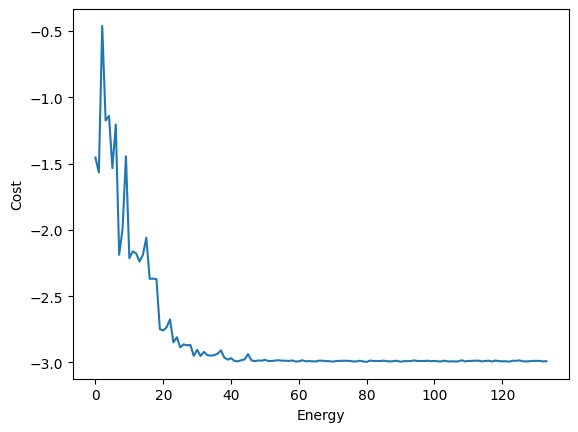

In [79]:
# Qiskit Pattern Step 4: Postprocess and analyze the Estimator V2 results
result = job.result()

fig, ax = plt.subplots()
plt.plot(range(result["iters"]), result["cost_history"])
plt.xlabel("Energy")
plt.ylabel("Cost")
plt.draw()

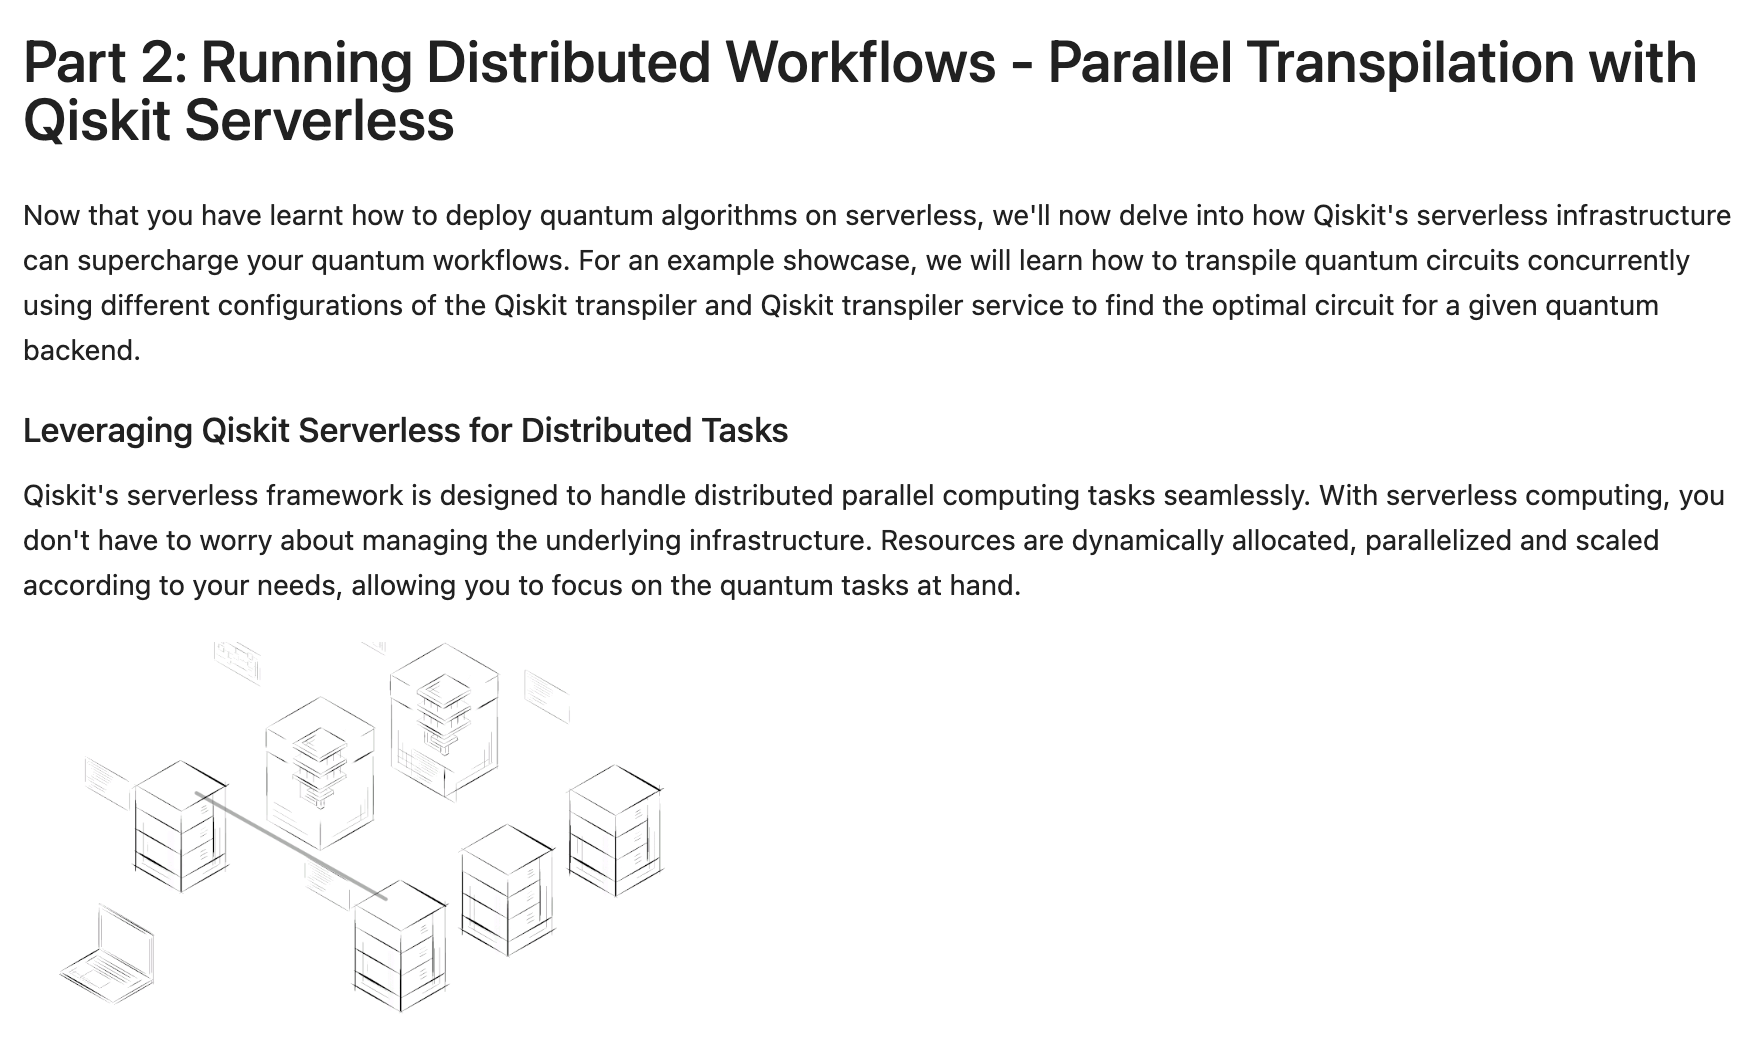

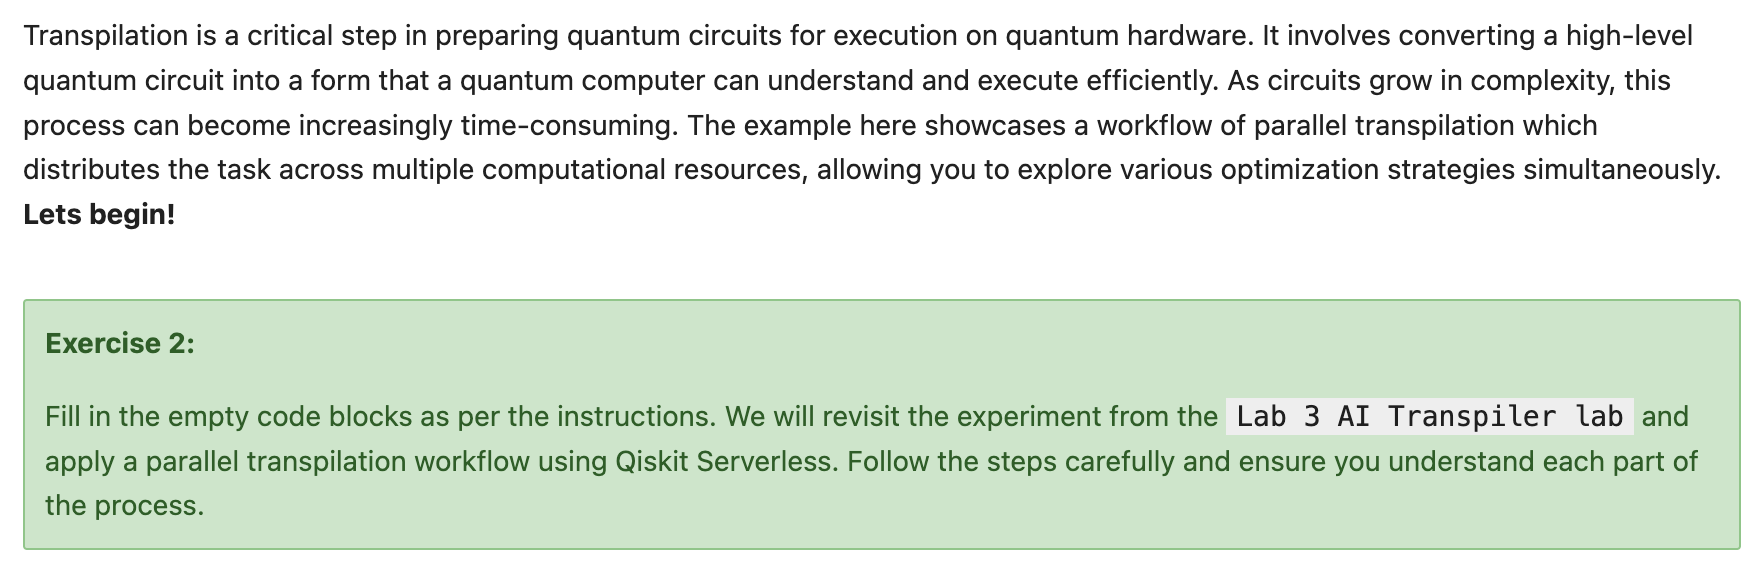

## Step 1: Setting up circuits
We begin by setting up the quantum circuits we want to optimize. These circuits will be the basis for the transpilation process. We will use a similar example from Lab 3 - AI Transpiler notebook for comparision:

In [35]:
# Setup 3 circuits with Efficient SU2
num_qubits = [41, 51, 61]
circuits = [EfficientSU2(nq, su2_gates=["rz","ry"], entanglement="circular", reps=1).decompose() for nq in num_qubits]

**Pick a backend**
Our abstract circuits are going to be optimised to run on this backend

In [242]:
QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token="16d6dd47657b972c1547b10fb7844fd1a407cc047430da104bd28a29a7394da2ea55115ecfcd09ba4e930ff8372156429ecf693000068b161a776b05b93c191b",
    set_as_default=True,
    overwrite=True,
)

# Load saved credentials
# service = QiskitRuntimeService()
service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.backend("ibm_brisbane")

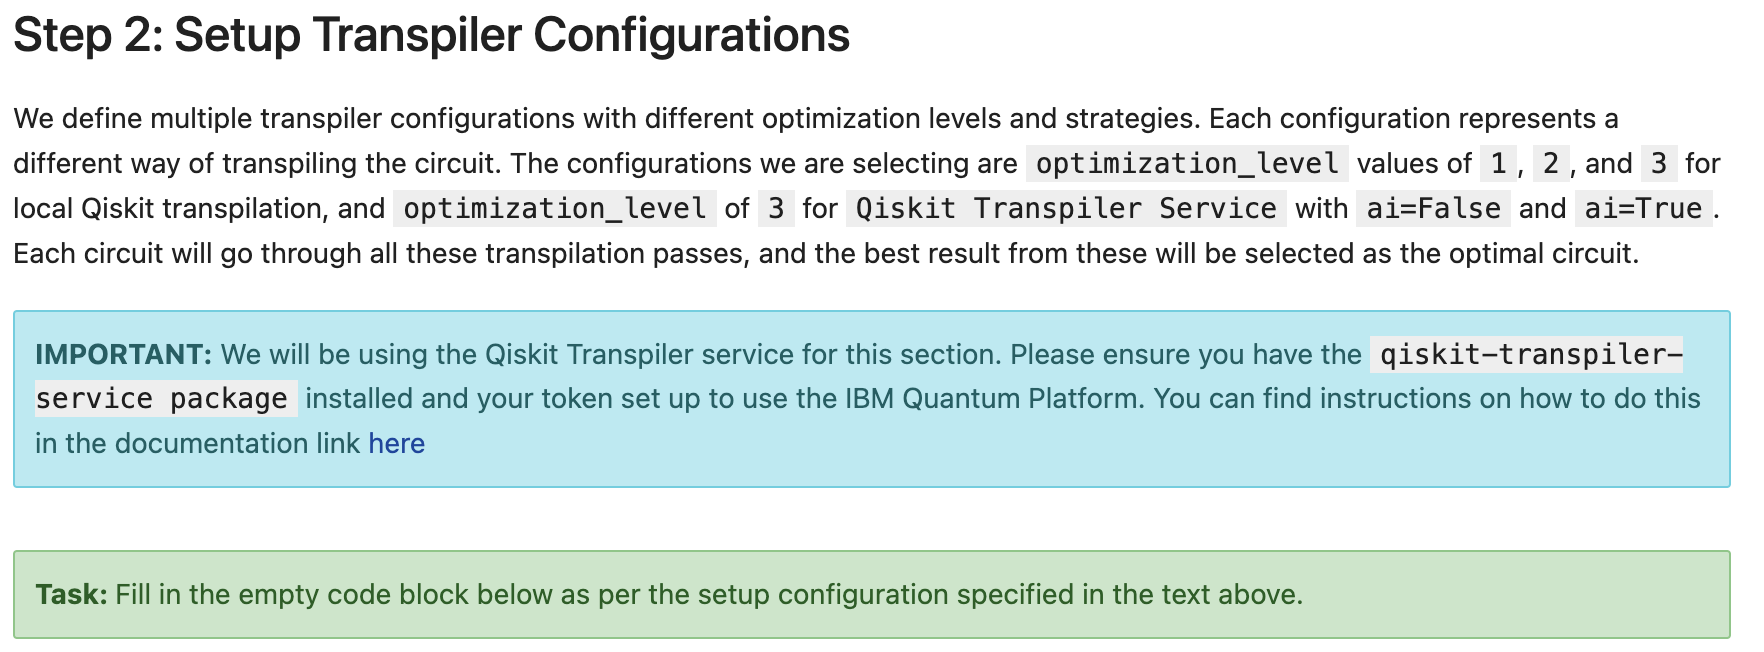

In [71]:
# Define Configs
optimization_levels = [0, 1, 2, 3]  # Choose the optimization levels you want to include

pass_managers = [{'pass_manager': generate_preset_pass_manager(optimization_level=level, backend=backend), 'optimization_level': level} for level in optimization_levels]

transpiler_services = [
    {'service': TranspilerService(backend_name='ibm_brisbane', optimization_level=3,ai= False), 'ai': False, 'optimization_level': 3},
    {'service': TranspilerService(backend_name='ibm_brisbane', optimization_level=3,ai= True,), 'ai': True, 'optimization_level': 3}
]

configs = pass_managers + transpiler_services
configs
# configs[5]['service']

[{'pass_manager': <qiskit.transpiler.passmanager.StagedPassManager at 0x7fed5f214bb0>,
  'optimization_level': 0},
 {'pass_manager': <qiskit.transpiler.passmanager.StagedPassManager at 0x7fed5f08e110>,
  'optimization_level': 1},
 {'pass_manager': <qiskit.transpiler.passmanager.StagedPassManager at 0x7fed5f5be860>,
  'optimization_level': 2},
 {'pass_manager': <qiskit.transpiler.passmanager.StagedPassManager at 0x7fed5f0c1c60>,
  'optimization_level': 3},
 {'service': <qiskit_transpiler_service.transpiler_service.TranspilerService at 0x7fed5f310460>,
  'ai': False,
  'optimization_level': 3},
 {'service': <qiskit_transpiler_service.transpiler_service.TranspilerService at 0x7fed5f3130d0>,
  'ai': True,
  'optimization_level': 3}]

## Step 3: Local Transpilation
Before distributing the tasks, let us run the transpilation locally to compare the results and establish a baseline. This step will help us ensure that our configurations are working as expected.

In [72]:
# Local transpilation setup
def transpile_parallel_local(circuit: QuantumCircuit, config):
    """Transpilation for an abstract circuit into an ISA circuit for a given config."""
    transpiled_circuit = config.run(circuit)
    return transpiled_circuit

In [73]:
# Run local transpilation
warnings.filterwarnings("ignore")

start = timer()

# Run transpilations locally for baseline
results = []
for circuit in circuits:
    for config in configs:
        if 'pass_manager' in config:
            results.append(transpile_parallel_local(circuit, config['pass_manager']))
        else:
            results.append(transpile_parallel_local(circuit, config['service']))

end = timer()

# Record local execution time
execution_time_local = end - start
print("Execution time locally: ", execution_time_local)

INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_tr

Execution time locally:  526.760474229


## Step 4: Setting up Qiskit Serverless Client
We will now use Qiskit Serverless module's capabilities to distribute these transpilation tasks across multiple computational nodes. From here, we will start setting up Qiskit Serverless to run and deploy distributed tasks.

First, we'll authenticate with Qiskit Serverless service on IBM Quantum Platform. This uses your default IBM Quantum Platform API Token

In [243]:
# Authenticate to the remote cluster and submit the pattern for remote execution if not done in previous exercise
serverless = IBMServerlessClient("16d6dd47657b972c1547b10fb7844fd1a407cc047430da104bd28a29a7394da2ea55115ecfcd09ba4e930ff8372156429ecf693000068b161a776b05b93c191b")

## Step 5: Create and deploy QiskitFunction on cloud
We have already created a transpile_parallel.py file containing the necessary run functions. Review this file to understand the workflow. Next, we will define a Qiskit Function that points to this file. Fill in the necessary details in the template provided below. API Documentation reference for QiskitFunction can be found here

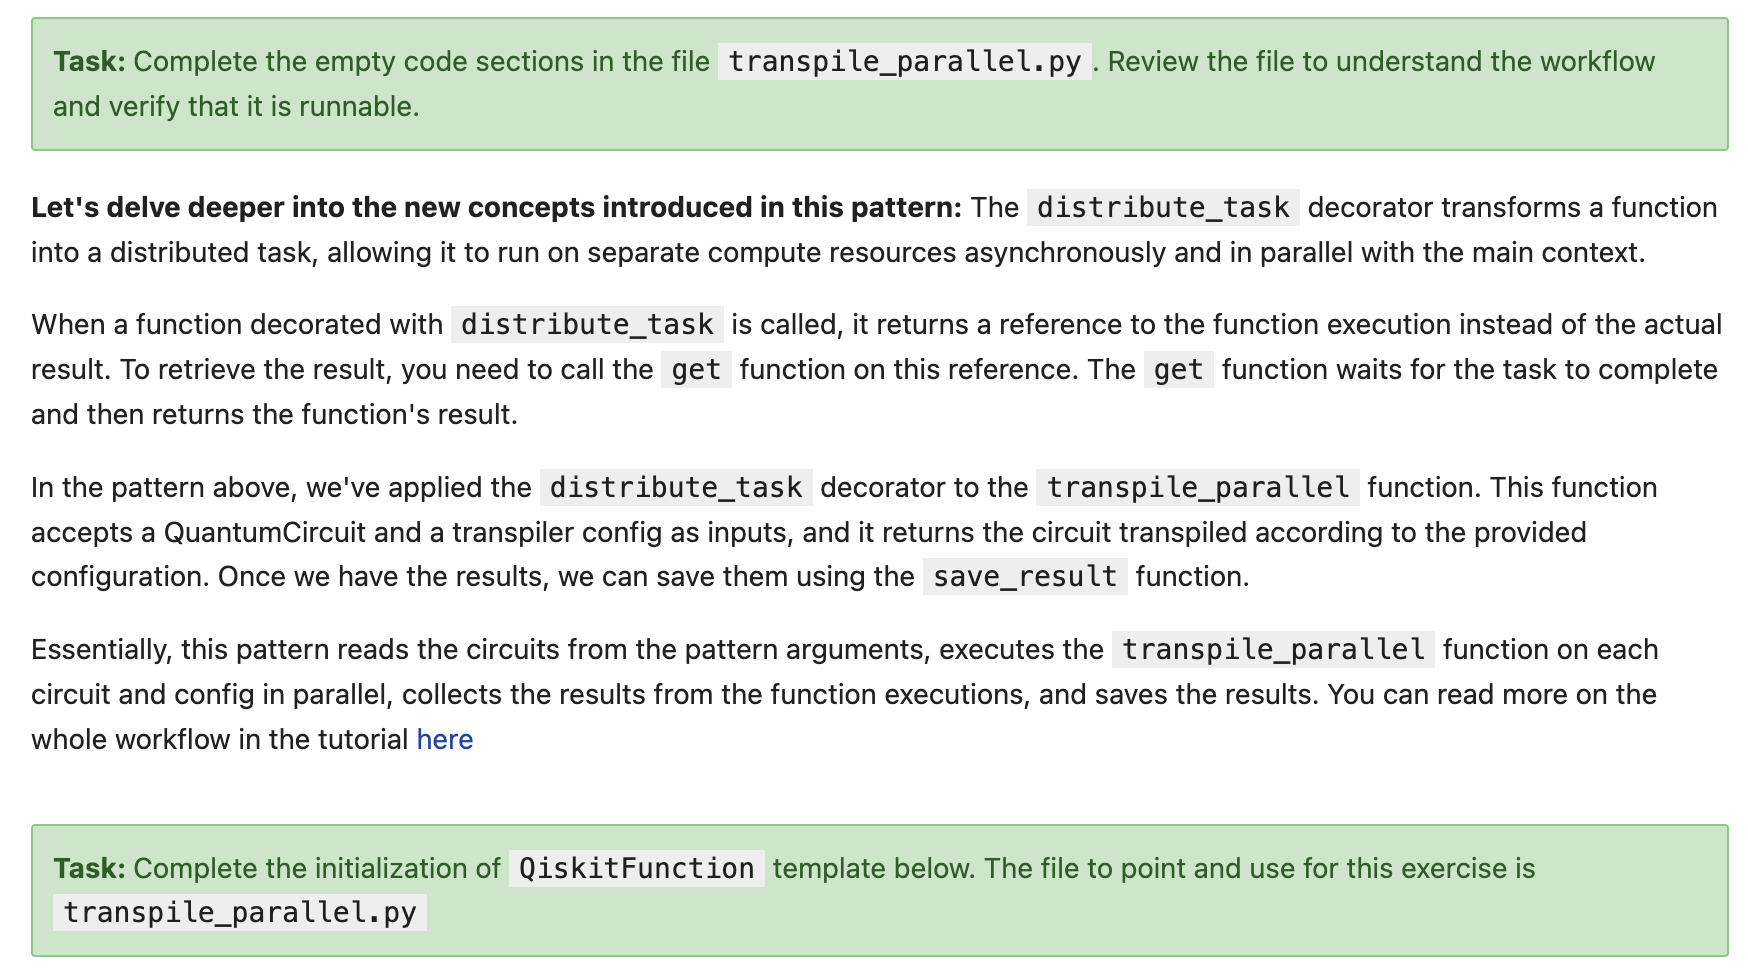

In [253]:
# Check if the entry point is correct
# print("Entry point:", transpile_parallel_function.entrypoint)

# Retrieve the content of the file associated with the function
with open("./transpile_parallel/transpile_parallel.py", 'r') as file:
    content = file.read()

# Print the content
print("File content:")
print(content)


File content:
# transpile_parallel.py

from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_transpiler_service.transpiler_service import TranspilerService
from qiskit_serverless import get_arguments, save_result, distribute_task, get
from qiskit_ibm_runtime import QiskitRuntimeService
from timeit import default_timer as timer

@distribute_task(target={"cpu": 2})
def transpile_parallel(circuit: QuantumCircuit, config):
    print(config)
    """Distributed transpilation for an abstract circuit into an ISA circuit for a given backend."""
    transpiled_circuit = config.run(circuit)
    return transpiled_circuit

# Get program arguments
arguments = get_arguments()
print(arguments)
circuits = arguments.get("circuits")
print(circuits)
backend_name = arguments.get("backend_name")

# Get backend
# service = QiskitRuntimeService(channel="ibm_quantum")
# backend = service.get_backend(backend_name)

# Define Configs
optimizat

In [254]:
transpile_parallel_function = QiskitFunction(
    title="transpile_parallel",
    entrypoint="transpile_parallel.py",
    working_dir="./transpile_parallel",
    dependencies=["qiskit-transpiler-service"]
)

QiskitFunction(transpile_parallel)

In [228]:
optimization_levels

[0, 1, 2, 3]

In [255]:
serverless.upload(transpile_parallel_function)

'transpile_parallel'

In [296]:
# transpiler_services = [
#     {'service': TranspilerService(backend_name='ibm_brisbane', optimization_level=3,ai= False), 'backend_name':'ibm_brisbane','ai': False, 'optimization_level': 3},
#     {'service': TranspilerService(backend_name='ibm_brisbane', optimization_level=3,ai= True,),'backend_name':'ibm_brisbane', 'ai': True, 'optimization_level': 3}
# ]

In [297]:
# transpiler_services

## Step 4: Execute the function on a serverless environment
Now that we have uploaded our QiskitFunction, we will run our transpilation tasks in a serverless environment and leverage Qiskit's serverless capabilities to distribute and execute these tasks efficiently. We can additionally also retrieve any function that we have previously uploaded. We can do so below:

In [290]:
# Get list of functions
serverless.list()

[QiskitFunction(transpile_parallel), QiskitFunction(vqe)]

**Task**: Complete the workflow below. Use the get function to fetch a specific function. Finally, execute your job by running your serverless function. Ensure you are passing the necessary arguments for the function by analyzing the file transpile_parallel.py

In [291]:
# Fetch the specific function titled "transpile_parallel"
transpile_parallel_serverless = serverless.list()[0]
transpile_parallel_serverless

QiskitFunction(transpile_parallel)

In [292]:
# Run the "transpile_parallel" function in the serverless environment
job = transpile_parallel_serverless.run(
    circuits=circuits,
    backend_name='ibm_brisbane')

In [293]:
# Submit your answer using following code
# transpiler_services1 = [
#     {'service': TranspilerService(backend_name='ibm_brisbane', optimization_level=3,ai= False), 'backend_name':'ibm_brisbane','ai': False, 'optimization_level': 3},
#     {'service': TranspilerService(backend_name='ibm_brisbane', optimization_level=3,ai= True,),'backend_name':'ibm_brisbane', 'ai': True, 'optimization_level': 3}
# ]
grade_lab3_qs_ex2([0,1,2,3], transpiler_services1, transpile_parallel_function, transpile_parallel_serverless, job)
# Expected result type: list, list, QiskitFunction, QiskitFunction, Job

Submitting your answer. Please wait...
Oops 😕! 'list' object has no attribute 'get'
Please review your answer and try again.


In [295]:
job.status()

'QUEUED'

In [241]:
logs = job.logs()

for log in logs.splitlines():
    print(log)

No logs yet.


In [203]:
result = job.result()
result_transpiled = result["transpiled_circuits"]

KeyboardInterrupt: 

In [ ]:
# Compare execution times:
execution_time_serverless = result["execution_time"]

from utils import plot_execution_times
plot_execution_times(execution_time_serverless, execution_time_local)

**Step 5**: Collect and Compare Results
Once the transpilation tasks are complete, gather the results and compare the transpiled circuits. Here, we evaluate based on the shortest depth of the transpiled circuit result to determine the best-performing circuit.

In [ ]:
from utils import process_transpiled_circuits

best_circuits, best_depths, best_methods = process_transpiled_circuits(configs, result_transpiled)

In [ ]:
# Display the best circuits, depths, and methods
for i, (circuit, depth, method) in enumerate(zip(best_circuits, best_depths, best_methods)):
    print(f"Best result for circuit {i + 1}:")
    print(f"  Depth: {depth}")
    print(f"  Method: {method}")
    # Display or process the best circuit as needed
    # e.g., circuit.draw(output="mpl")

In [153]:
# transpiler_services = [
#     {'service': TranspilerService(backend_name='ibm_brisbane', optimization_level=3,ai= False),'ai': False, 'optimization_level': 3},
#     {'service': TranspilerService(backend_name='ibm_brisbane', optimization_level=3,ai= True,),'backend_name':'ibm_brisbane', 'ai': True, 'optimization_level': 3}
# ]

In [172]:
import qiskit
print(dir(qiskit.providers))

['Backend', 'BackendConfigurationError', 'BackendPropertyError', 'BackendV1', 'BackendV2', 'BackendV2Converter', 'Job', 'JobError', 'JobStatus', 'JobTimeoutError', 'JobV1', 'Options', 'Provider', 'ProviderV1', 'QiskitBackendNotFoundError', 'QubitProperties', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'backend', 'backend_compat', 'basic_provider', 'convert_to_target', 'exceptions', 'fake_provider', 'job', 'jobstatus', 'models', 'options', 'provider', 'providerutils']


In [288]:
from qiskit.providers import Job

def grade_lab3(
    optimization_levels: list,
    transpiler_services: list,
    transpile_parallel_circuit: QiskitFunction,
    transpile_parallel_serverless: QiskitFunction,
    job: Job,
) -> None:
    check_entry = transpile_parallel_circuit.entrypoint
    job_valid = isinstance(job, Job)
    # print(service["service"])
    transpilerservice_check = [
        [
            service["service"].ai,
            service["service"].backend_name,
            service["service"].optimization_level,
        ]
        for service in transpiler_services
    ]
    config_check = [
        transpile_parallel_serverless.raw_data["title"],
        transpile_parallel_serverless.raw_data["entrypoint"],
    ]

    answer = [
        list(set(optimization_levels)),
        transpilerservice_check,
        check_entry,
        config_check,
        job_valid,
    ]
    grade(answer, "lab3-qs-ex2", '_challenge_id')
    return answer

def grade(
    answer,
    question,
    challenge,
    # return_response,
    **kwargs):
# ) -> Tuple[bool, Optional[Union[str, int, float]], Optional[Union[str, int, float]]]:
#     serialized_answer = to_json(answer, **kwargs)
    do_submit = not do_grade_only()

    # if challenge is None and '/' in str(question):
    #     challenge_id = question.split('/')[0]
    #     question_id = question.split('/')[1]
    # else:
    #     question_id = question
    #     challenge_id = challenge

    if do_submit:
        endpoint = get_submission_endpoint(question_id, challenge_id)
        payload = {
            'question_name': question_id,
            'challenge_id': challenge_id,
            'content': serialized_answer
        }
    else:
        endpoint = get_grading_endpoint(question_id, challenge_id)
        payload = {'answer': serialized_answer}

    if serialized_answer is not None and endpoint:
        print(f'{"Submitting" if do_submit else "Grading"} your answer. Please wait...')

        result = grade_answer(
            payload,
            endpoint,
            do_submit=do_submit,
            max_content_length=kwargs.get('max_content_length', None),
            return_response=return_response
        )

        if return_response:
            return result
    else:
        handle_grade_response('failed')

grade_lab3(optimization_levels, transpiler_services, transpile_parallel_function, transpile_parallel_serverless, job)
# Expected result type: list, list, QiskitFunction, QiskitFunction, Job

NameError: name 'do_grade_only' is not defined

In [140]:
# print(dir(service))



['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_account', '_api_client', '_authenticate_ibm_quantum_account', '_backend_configs', '_backends', '_channel', '_channel_strategy', '_check_api_version', '_client_params', '_create_backend_obj', '_current_instance', '_decode_job', '_discover_account', '_discover_backends', '_discover_cloud_backends', '_get_hgp', '_hgps', '_initialize_hgps', '_resolve_crn', '_set_backend_config', '_validate_channel_strategy', 'active_account', 'backend', 'backends', 'channel', 'delete_account', 'delete_job', 'get_backend', 'global_service', 'instances', 'job', 'jobs', 'least_busy', 'run', 'save_accou

In [143]:
service.backend()

<IBMBackend('ibm_brisbane')>

In [152]:
# transpiler_services = [
#     {'service': TranspilerService(backend_name='ibm_brisbane', optimization_level=3,ai= False),'ai': False, 'optimization_level': 3},
#     {'service': TranspilerService(backend_name='ibm_brisbane', optimization_level=3,ai= True,),'backend_name':'ibm_brisbane', 'ai': True, 'optimization_level': 3}
# ]

# transpilerservice_check = [
#         [
#             service["service"].ai,
#             service["service"].backend_name,
#             service["service"].optimization_level,
#         ]
#         for service in transpiler_services
#     ]


# transpilerservice_check

[[False, 'ibm_brisbane', 3], [True, 'ibm_brisbane', 3]]